# Capstone Project : COVID-19 Predictions I
---

This prediction aims to forecast confirmed cases and fatalities between April 11 - 25, based on data collated from Jan 22 - April 10. We'll try to predict confirmed cases per country using 3 regression techniques.

---


#### Import Tools & Datasets

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
# import matplotlib.colors as mcolors
import seaborn as sns
sns.set()  # Set style & figures inline

import requests
import time
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import random
import math
import time
import datetime
# import operator 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from statsmodels.tsa.arima_model import ARIMA                    # remove if not using

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

plt.style.use('fivethirtyeight')
%matplotlib inline


C:\Users\domin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importing datetime formatted training and test dataset that was previously created
train = pd.read_csv('./datasets/train.csv')
testy = pd.read_csv('./datasets/test.csv')

In [3]:
testy.head()

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths
0,NaN,Afghanistan,33.0000,65.0000,2020-04-11,555,18
1,NaN,Albania,41.1533,20.1683,2020-04-11,433,23
2,NaN,Algeria,28.0339,1.6596,2020-04-11,1825,275
3,NaN,Andorra,42.5063,1.5218,2020-04-11,601,26
4,NaN,Angola,-11.2027,17.8739,2020-04-11,19,2


In [4]:
test = testy.drop(['confirmed'], axis=1)

---
### Training Models
---
Using datetime features

In [5]:
train.head(100)

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,2020-01-22,0,0
6,NaN,Argentina,-38.4161,-63.6167,2020-01-22,0,0
7,NaN,Armenia,40.0691,45.0382,2020-01-22,0,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0


In [6]:
test.head()

,Province/State,Country/Region,Lat,Long,date,deaths
0,NaN,Afghanistan,33.0000,65.0000,2020-04-11,18
1,NaN,Albania,41.1533,20.1683,2020-04-11,23
2,NaN,Algeria,28.0339,1.6596,2020-04-11,275
3,NaN,Andorra,42.5063,1.5218,2020-04-11,26
4,NaN,Angola,-11.2027,17.8739,2020-04-11,2


In [7]:
train['date']= pd.to_datetime(train['date'], errors='coerce') 
test['date']= pd.to_datetime(test['date'], errors='coerce') 

In [8]:
# feature engineering new columns from datetime format for train set
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['dayofweek'] = train['date'].dt.dayofweek
train['dayofyear'] = train['date'].dt.dayofyear
train['quarter'] = train['date'].dt.quarter
train['weekofyear'] = train['date'].dt.weekofyear

# feature engineering new columns from datetime format for test set
test['day'] = test['date'].dt.day
test['month'] = test['date'].dt.month
test['dayofweek'] = test['date'].dt.dayofweek
test['dayofyear'] = test['date'].dt.dayofyear
test['quarter'] = test['date'].dt.quarter
test['weekofyear'] = test['date'].dt.weekofyear

countries = list(train['Country/Region'].unique())
sg_code = countries.index('Singapore')
train = train.drop(['date','Lat', 'Long'],1)
test =  test.drop(['date','Lat', 'Long'],1)

# fill countries without province/state data with NaN
train["Province/State"].fillna('NaN', inplace=True)
test["Province/State"].fillna('NaN', inplace=True)

# instantiate ordinal encoder
# https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder
oe = OrdinalEncoder()

# assigning float value to corresponding country and province/state including NaN (somewhat dummifying for features)
train[['Province/State','Country/Region']] = oe.fit_transform(train.loc[:,['Province/State','Country/Region']])
test[['Province/State','Country/Region']] = oe.fit_transform(test.loc[:,['Province/State','Country/Region']])

In [9]:
train_columns = ['day','month','dayofweek','dayofyear','quarter','weekofyear','Province/State', 'Country/Region','confirmed', 'deaths']
train = train[train_columns]
test_columns = ['day','month','dayofweek','dayofyear','quarter','weekofyear','Province/State','Country/Region', 'deaths']
test_model = test[test_columns]

X = train.drop(['confirmed'], axis=1)
y = train['confirmed']
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
test_sg = test_model[test_model['Country/Region'] == sg_code]

In [10]:
models = []
training_mse = []
training_rmse = []
test_mse = []
test_rmse = []
# rmsle = []

In [11]:
test_actual = testy['confirmed']
test_actual.shape

(3486,)

---
Linear Regression Model

In [12]:
# linear regression model
lm = LinearRegression(normalize=True, fit_intercept=True)
lm.fit(X_train, y_train)

# preiction for test and val set
pred = lm.predict(X_test)
lm_forecast = lm.predict(test_model)

models.append('Linear Regression')

training_mse.append(round(mean_squared_error(y_test, pred),2))
training_rmse.append(round(np.sqrt(mean_squared_error(y_test, pred)),2))

test_mse.append(round(mean_squared_error(test_actual, lm_forecast),2))
test_rmse.append(round(np.sqrt(mean_squared_error(test_actual, lm_forecast)),2))
# rmsle.append(round(np.sqrt(mean_squared_log_error(lm_forecast, test_actual)),2))

---
Random Forest Regression Model

In [13]:
# random forest regression model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

# preiction for test and val set
pred = rf.predict(X_test)
rfr_forecast = rf.predict(test_model)

models.append('Random Forest')

training_mse.append(round(mean_squared_error(y_test, pred),2))
training_rmse.append(round(np.sqrt(mean_squared_error(y_test, pred)),2))

test_mse.append(round(mean_squared_error(test_actual, rfr_forecast),2))
test_rmse.append(round(np.sqrt(mean_squared_error(test_actual, rfr_forecast)),2))
# rmsle.append(round(np.sqrt(mean_squared_log_error(rfr_forecast, test_actual)),2))

---
XGBoost Regression Model

In [14]:
# xgboose requires all the columns to be in order
xgb_test = test_model[['day', 'month', 'dayofweek', 'dayofyear', 'quarter', 'weekofyear', 'Province/State', 'Country/Region', 'deaths']]
# xgboost regression model
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train,y_train)

# preiction for test and val set
pred = xgb.predict(X_test)
xgb_forecast = xgb.predict(xgb_test)

models.append('XGBoost')

training_mse.append(round(mean_squared_error(y_test, pred),2))
training_rmse.append(round(np.sqrt(mean_squared_error(y_test, pred)),2))

test_mse.append(round(mean_squared_error(test_actual, xgb_forecast),2))
test_rmse.append(round(np.sqrt(mean_squared_error(test_actual, xgb_forecast)),2))
# rmsle.append(round(np.sqrt(mean_squared_log_error(xgb_forecast, test_actual)),2))

In [15]:
xgb.fit(X_test, y_test)
xgb_forecast = xgb.predict(xgb_test)

---
Comparing RMSE values

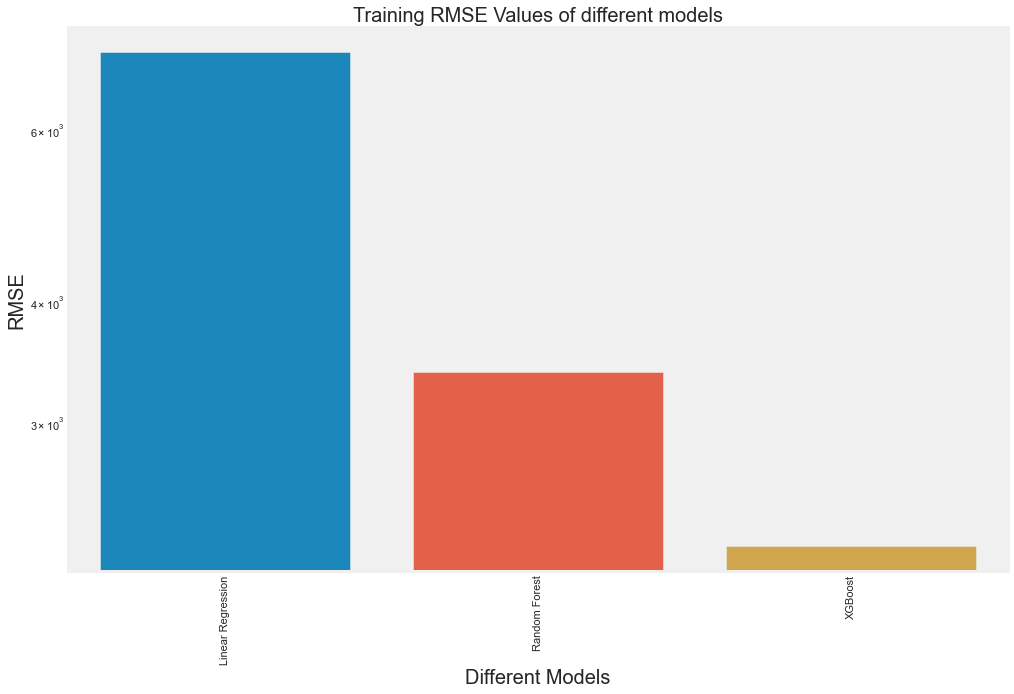

In [16]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Different Models",fontsize = 20)
plt.ylabel('RMSE',fontsize = 20)
plt.title("Training RMSE Values of different models" , fontsize = 20)
sns.barplot(x=models,y=training_rmse, log=True);

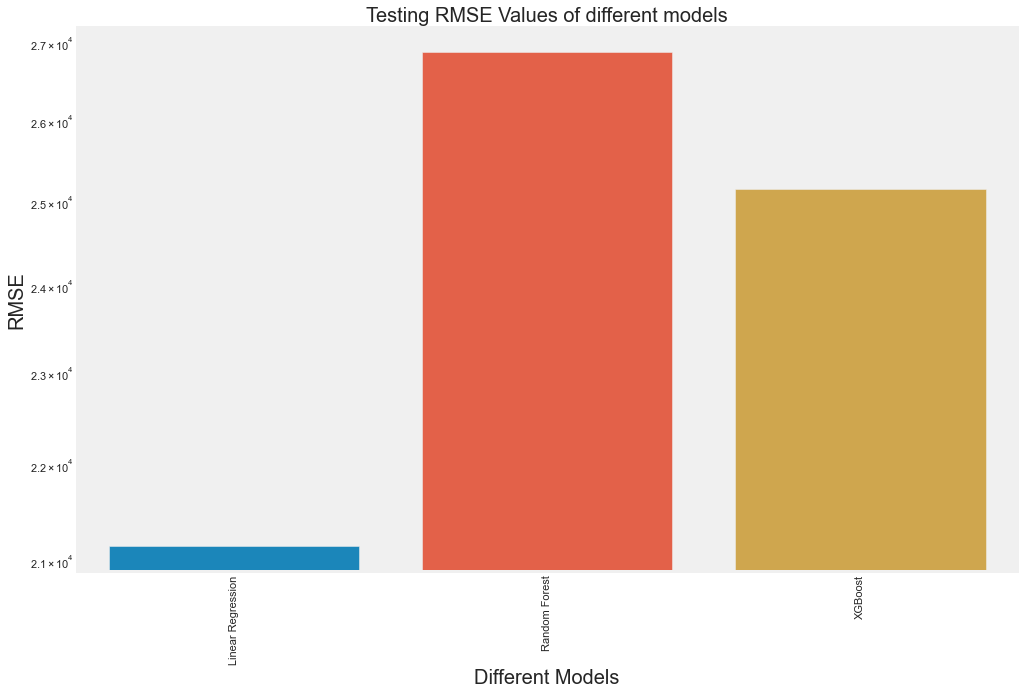

In [17]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Different Models",fontsize = 20)
plt.ylabel('RMSE',fontsize = 20)
plt.title("Testing RMSE Values of different models" , fontsize = 20)
sns.barplot(x=models,y=test_rmse, log=True);

In [18]:
compare = pd.DataFrame(np.column_stack([models, training_mse, test_mse, training_rmse, test_rmse]), 
                       columns=['Model', 'Training MSE', 'Test MSE', 'Training RMSE', 'Test RMSE'])
compare

,Model,Training MSE,Test MSE,Training RMSE,Test RMSE
0,Linear Regression,52018937.91,446977765.29,7212.42,21141.85
1,Random Forest,11449357.65,722321988.99,3383.69,26876.05
2,XGBoost,5020988.94,632523261.2,2240.76,25150.02


With the training set, the linear regression model performed the worst based on the above experiment. With the test set, all models performed significantly worse than with the training set, though the linear regression model performed better than the other two.

---
